In [45]:
import json
import pandas as pd
from datetime import datetime
import glob
import os

# Create a list to store all keyword data
keyword_records = []

# Get all json files in the search_volume folder
json_files = glob.glob('../search_volumes/*.json')
print(f"Found {len(json_files)} JSON files to process")

for file_path in json_files:
    print(f"Processing file: {file_path}")
    # Load each json file
    with open(file_path, 'r') as f:
        keywords_data = json.load(f)

    # Extract keywords and data from each file
    if 'tasks' in keywords_data and len(keywords_data['tasks']) > 0:
        task = keywords_data['tasks'][0]
        if 'data' in task and 'keywords' in task['data']:
            keywords_list = task['data']['keywords']
            results = task['result'] if 'result' in task else []
            print(f"  Found {len(keywords_list)} keywords and {len(results)} results")

            for i, keyword in enumerate(keywords_list):
                if i < len(results):
                    result = results[i]
                    keyword_record = {
                        'keyword': keyword,
                        'search_volume': result.get('search_volume', 0),
                        'competition': result.get('competition_index', 'unknown'),
                        'low_top_of_page_bid': result.get('low_top_of_page_bid', 0),
                        'high_top_of_page_bid': result.get('high_top_of_page_bid', 0),
                        'cpc': result.get('cpc', 0)
                    }

                    # Add monthly search volumes as separate columns
                    if result.get('monthly_searches'):
                        for month_data in result['monthly_searches']:
                            year = month_data.get('year')
                            month = month_data.get('month')
                            column_name = f"{year}_{month:02d}"
                            keyword_record[column_name] = month_data.get('search_volume', 0)

                    keyword_records.append(keyword_record)

# Create DataFrame
df = pd.DataFrame(keyword_records)

print(f"DataFrame created with {len(df)} rows and {len(df.columns)} columns")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
df


Found 10 JSON files to process
Processing file: ../search_volumes/search_volume_results_3.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_volume_results_7.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_volume_results_8.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_volume_results_1.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_volume_results_4.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_volume_results_5.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_volume_results_9.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_volume_results_0.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_volume_results_6.json
  Found 1000 keywords and 1000 results
Processing file: ../search_volumes/search_

,keyword,search_volume,competition,low_top_of_page_bid,high_top_of_page_bid,cpc,2025_09,2025_08,2025_07,2025_06,2025_05,2025_04,2025_03,2025_02,2025_01,2024_12,2024_11,2024_10
0,multicurrency support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,application management,4400.0,9.0,0.60,13.45,6.73,3600.0,2900.0,3600.0,3600.0,3600.0,4400.0,5400.0,3600.0,4400.0,3600.0,4400.0,4400.0
2,smart thermostat,201000.0,100.0,0.32,2.22,1.30,165000.0,201000.0,246000.0,201000.0,90500.0,110000.0,550000.0,201000.0,135000.0,135000.0,165000.0,165000.0
3,beach gear bundle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,audience retention,1900.0,1.0,0.13,0.38,22.84,1900.0,1600.0,1600.0,1300.0,1600.0,1600.0,1600.0,1300.0,1600.0,1600.0,2400.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,power draw,210.0,5.0,NaN,NaN,NaN,260.0,320.0,170.0,210.0,170.0,170.0,210.0,260.0,210.0,90.0,170.0,170.0
9996,hybrid professionals,5400.0,28.0,0.05,0.46,0.37,8100.0,5400.0,4400.0,6600.0,4400.0,4400.0,4400.0,4400.0,4400.0,4400.0,4400.0,4400.0
9997,air cargo services,1300.0,9.0,0.27,7.65,10.49,1300.0,720.0,880.0,880.0,1300.0,1300.0,1300.0,1000.0,1300.0,1900.0,1900.0,1600.0
9998,experience management,50.0,100.0,0.11,1.00,4.05,20.0,40.0,20.0,40.0,30.0,40.0,30.0,50.0,70.0,50.0,110.0,30.0


In [46]:

# Remove duplicate rows based on the 'keyword' column
df = df.drop_duplicates(subset=['keyword'], keep='first')

print(f"\nAfter removing duplicates:")
print(f"DataFrame now has {len(df)} rows")


After removing duplicates:
DataFrame now has 10000 rows


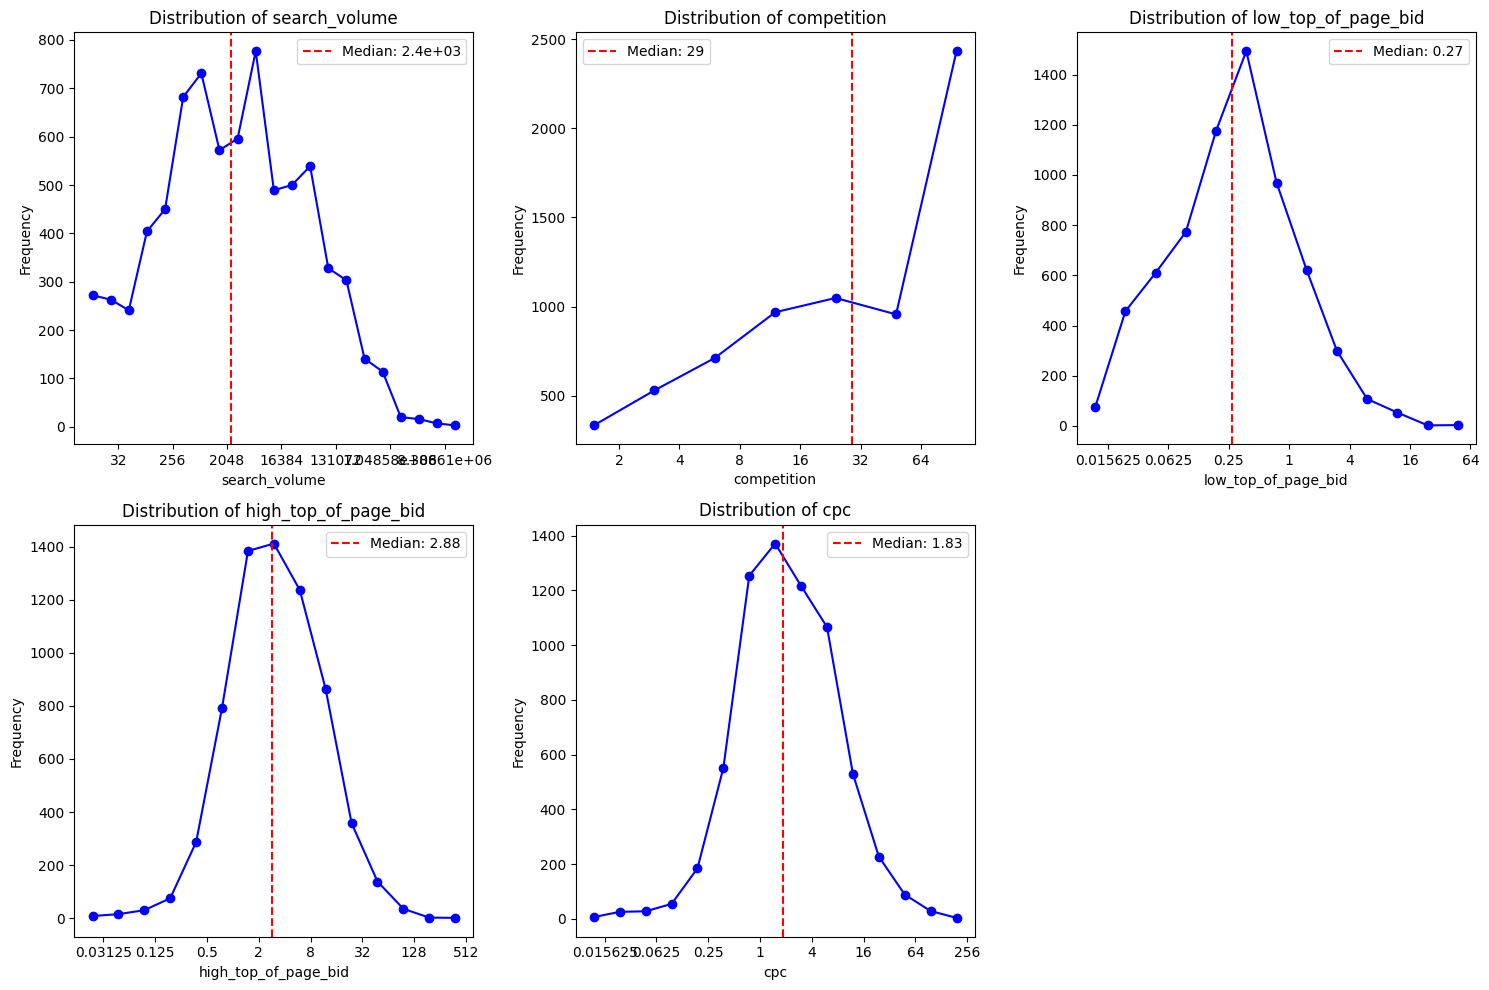

In [47]:
import matplotlib.pyplot as plt
import numpy as np
# Create histograms for numerical columns
base_columns = ['search_volume', 'competition', 'low_top_of_page_bid', 'high_top_of_page_bid', 'cpc']
numerical_columns = [col for col in df.columns if col in base_columns]

# Calculate number of rows and columns for subplot grid
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Remove zeros and NaN values for better visualization
    data = df[col][df[col] > 0].dropna()
    
    if len(data) > 0:
        # Calculate log2 bins
        min_val = np.floor(np.log2(data.min()))
        max_val = np.ceil(np.log2(data.max()))
        
        # Create bins as powers of 2
        bins = [2**x for x in range(int(min_val), int(max_val)+1)]
        
        # Create histogram and get bin counts/edges
        counts, edges = np.histogram(data, bins=bins)
        # Get bin centers for point plot
        centers = (edges[:-1] + edges[1:]) / 2
        
        # Plot points
        plt.plot(centers, counts, 'o-', color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xscale('log', base=2)  # Use log base 2
        
        # Format x-axis with actual numbers and ensure values below 1 display properly
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:g}'))
        plt.gca().xaxis.set_minor_formatter(plt.FuncFormatter(lambda x, _: f'{x:g}'))
        
        # Add median line
        median = data.median()
        plt.axvline(x=median, color='red', linestyle='--', 
                   label=f'Median: {median:.3g}')
        plt.legend()

plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

def smooth_series(volumes, alpha=0.3):
    return pd.Series(volumes).ewm(alpha=alpha).mean().tolist()

def trend_slope(volumes):
    X = np.arange(len(volumes)).reshape(-1, 1)
    y = np.array(volumes)
    model = LinearRegression().fit(X, y)
    return model.coef_[0]  # positive = upward trend

def trend_consistency(volumes):
    diffs = np.diff(volumes)
    return np.mean(diffs > 0)  # % of months with growth

def weighted_trend(volumes, alpha=0.4):
    n = len(volumes)
    weights = np.exp(alpha * np.arange(n))  # heavier on recent months
    X = np.arange(n).reshape(-1, 1)
    y = np.array(volumes)
    model = LinearRegression().fit(X, y, sample_weight=weights)
    return model.coef_[0]

def recent_stability(volumes, k=3):
    last = volumes[-1]
    recent_avg = np.mean(volumes[-k:])
    max_val = np.max(volumes)
    return min(last / max_val, last / recent_avg)

def sustained_growth_score(volumes, alpha=0.3):
    smoothed = pd.Series(volumes).ewm(alpha=alpha).mean().tolist()
    
    # Weighted trend
    slope = weighted_trend(smoothed)
    
    # Trend fit and consistency
    X = np.arange(len(smoothed)).reshape(-1, 1)
    model = LinearRegression().fit(X, smoothed)
    r2 = model.score(X, smoothed)
    consistency = np.mean(np.diff(smoothed) > 0)
    
    # Recent stability
    stability = recent_stability(smoothed)
    
    normalized_slope = slope / np.mean(smoothed)
    
    score = normalized_slope * consistency * r2 * stability
    return {
        "slope": slope,
        "r2": r2,
        "consistency": consistency,
        "stability": stability,
        "score": score
    }

In [53]:
# Count keywords with both YoY trend and CPC data
df = df.dropna(axis=0, how='any')

print(f"\nNumber of fully populated keywords: {df.shape[0]}")
# df.sort_values(by='yoy_trend_%', ascending=False).head(50)


Number of fully populated keywords: 6443



Trend Statistics:
       sustained_growth_score   yoy_trend_%  3month_trend_%
count             6443.000000   6443.000000     6437.000000
mean                 0.008215     32.800157       34.642693
std                  0.020752    473.666699      394.753648
min                 -0.009726   -100.000000      -98.222222
25%                 -0.000582    -18.214372        0.000000
50%                  0.000225      0.000000       18.750000
75%                  0.008396     27.272727       28.571429
max                  0.353344  26900.000000    23542.857143


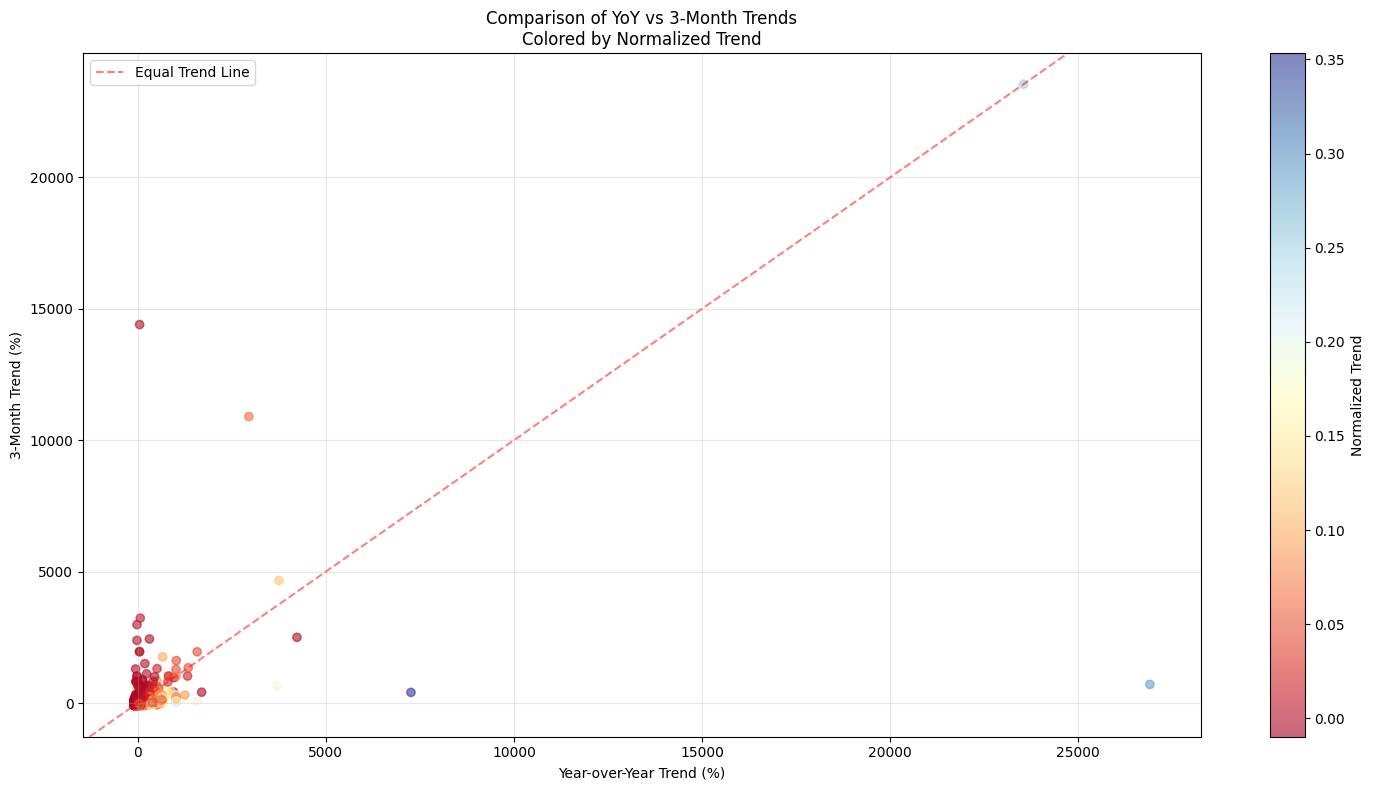

In [56]:
# Get all monthly volume columns
monthly_cols = df.filter(regex='\d{4}_\d{2}').columns

# Calculate sustained growth score for each keyword
growth_scores = df[monthly_cols].apply(sustained_growth_score, axis=1)
df['growth_slope'] = growth_scores.apply(lambda x: x['slope'])
df['growth_r2'] = growth_scores.apply(lambda x: x['r2']) 
df['growth_consistency'] = growth_scores.apply(lambda x: x['consistency'])
df['growth_stability'] = growth_scores.apply(lambda x: x['stability'])
df['sustained_growth_score'] = growth_scores.apply(lambda x: x['score'])

# Calculate Year-over-Year (YoY) trend
last_month = df[monthly_cols].iloc[:,-1]  # Most recent month
last_year_month = df[monthly_cols].iloc[:,-12]  # Same month last year

# Calculate YoY change percentage
yoy_trend = ((last_month - last_year_month) / last_year_month * 100)
df['yoy_trend_%'] = yoy_trend

# Calculate 3-month trend
last_3_months = df[monthly_cols].iloc[:,-3:]
first_month = last_3_months.iloc[:,0]
last_month = last_3_months.iloc[:,-1]

# Calculate 3-month change percentage
three_month_trend = ((last_month - first_month) / first_month * 100)
df['3month_trend_%'] = three_month_trend

# Display summary statistics of the trend columns
print("\nTrend Statistics:")
print(df[['sustained_growth_score', 'yoy_trend_%', '3month_trend_%']].describe())

# Create scatter plot comparing trends
plt.figure(figsize=(15, 8))

# Plot YoY vs 3-month trends, colored by normalized trend
scatter = plt.scatter(df['yoy_trend_%'], df['3month_trend_%'], 
                     c=df['sustained_growth_score'], cmap='RdYlBu',
                     alpha=0.6)
plt.colorbar(scatter, label='Normalized Trend')

plt.xlabel('Year-over-Year Trend (%)')
plt.ylabel('3-Month Trend (%)')
plt.title('Comparison of YoY vs 3-Month Trends\nColored by Normalized Trend')

# Add diagonal reference line
plt.axline([0, 0], [1, 1], color='red', linestyle='--', alpha=0.5,
           label='Equal Trend Line')

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
months_columns = [col for col in df.columns if col.startswith('20')]
df.sort_values(by='sustained_growth_score', ascending=False).head(20)

,keyword,search_volume,competition,low_top_of_page_bid,high_top_of_page_bid,cpc,2025_09,2025_08,2025_07,2025_06,...,2024_12,2024_11,2024_10,growth_slope,growth_r2,growth_consistency,growth_stability,sustained_growth_score,yoy_trend_%,3month_trend_%
2304,artisanal bread delivery,1300.0,100.0,0.70,2.48,1.26,110.0,70.0,90.0,70.0,...,1600.0,6600.0,8100.0,623.038699,0.496160,0.818182,1.000000,0.353344,7263.636364,406.250000
4174,commercial electricity supplier,1000.0,58.0,45.62,115.80,193.01,30.0,70.0,40.0,90.0,...,1000.0,1900.0,8100.0,417.814325,0.406674,0.727273,1.000000,0.291698,26900.000000,710.000000
562,personalized family letter,2900.0,6.0,1.48,3.76,5.87,140.0,70.0,90.0,110.0,...,140.0,2900.0,33100.0,1412.405687,0.267012,0.727273,1.000000,0.253533,23542.857143,23542.857143
2784,focus lens kit,2400.0,100.0,0.03,0.53,0.21,480.0,480.0,590.0,480.0,...,4400.0,9900.0,5400.0,687.870051,0.614998,0.727273,1.000000,0.219019,1025.000000,22.727273
2535,concentration booster,1000.0,100.0,0.53,1.78,1.98,320.0,390.0,390.0,480.0,...,880.0,2400.0,3600.0,216.231090,0.692937,1.000000,1.000000,0.210880,1025.000000,309.090909
2425,task tracking software,3600.0,23.0,0.94,39.13,27.54,1300.0,720.0,880.0,880.0,...,6600.0,12100.0,9900.0,947.376408,0.733867,0.727273,1.000000,0.193814,661.538462,50.000000
9678,law compliance software,2400.0,12.0,0.41,23.97,12.57,480.0,720.0,590.0,590.0,...,5400.0,9900.0,8100.0,793.280609,0.584851,0.636364,1.000000,0.190354,1587.500000,50.000000
2071,seafood deals,1300.0,92.0,0.75,3.09,2.54,260.0,390.0,390.0,390.0,...,1300.0,1300.0,9900.0,442.364284,0.370624,0.818182,1.000000,0.188040,3707.692308,661.538462
9904,curriculum design services,40500.0,31.0,1.12,3.91,2.15,6600.0,8100.0,8100.0,6600.0,...,40500.0,246000.0,74000.0,13451.031473,0.556971,0.636364,0.937604,0.184050,1021.212121,82.716049
7842,professional online degree,110.0,63.0,1.27,10.50,7.05,30.0,40.0,50.0,70.0,...,140.0,170.0,390.0,22.809008,0.766765,0.818182,1.000000,0.179797,1200.000000,178.571429


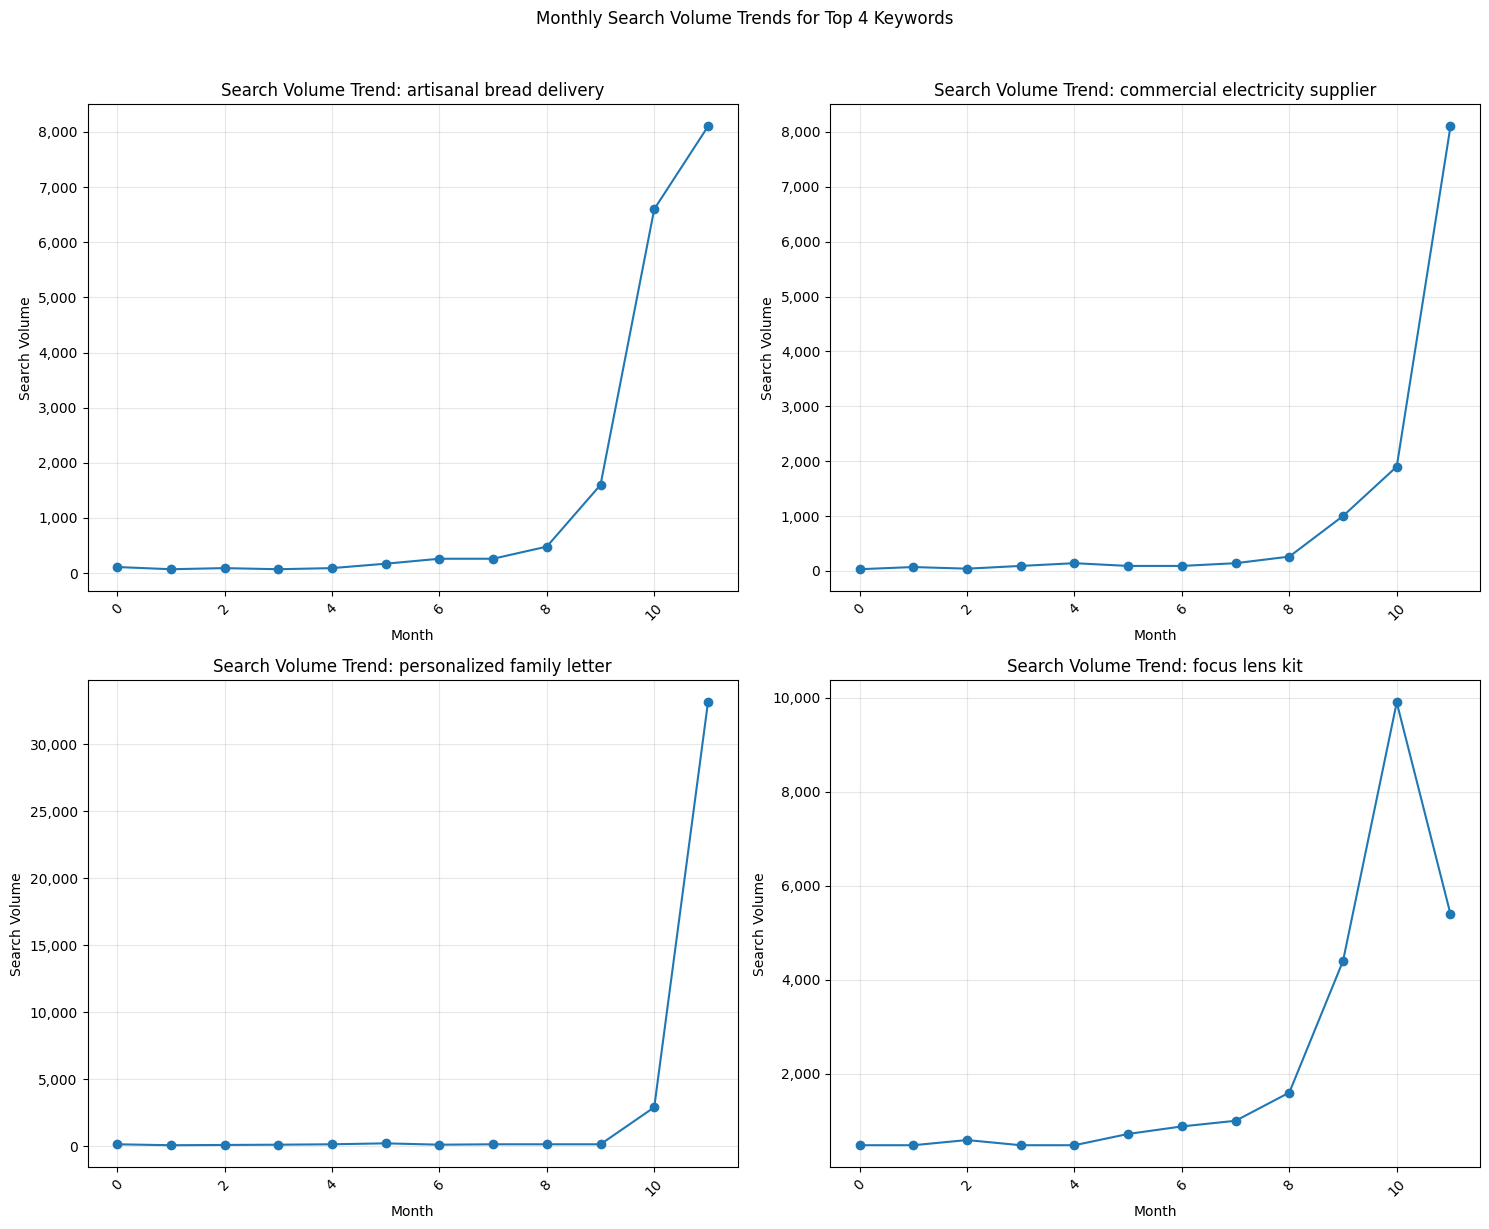

In [58]:
# Plot top 4 keywords by robust trend
top_4_keywords = df.nlargest(4, 'sustained_growth_score')
# top_4_keywords = df.nlargest(4, 'exp_avg_trend')
# top_4_keywords = df.nlargest(4, '3month_trend_%')
monthly_data = df[months_columns]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Plot each keyword in its own subplot
for idx, (_, row) in enumerate(top_4_keywords.iterrows()):
    keyword = row['keyword']
    keyword_data = monthly_data.loc[row.name]
    
    axes[idx].plot(range(len(months_columns)), keyword_data, marker='o')
    axes[idx].set_title(f'Search Volume Trend: {keyword}')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Search Volume')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3)
    
    # Format y-axis with comma separator for thousands
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.suptitle('Monthly Search Volume Trends for Top 4 Keywords', y=1.02)
plt.tight_layout()
plt.show()


In [59]:
# Count keywords with both YoY trend and CPC data
valid_keywords = df[
    df['yoy_trend_%'].notna() & 
    df['cpc'].notna()
]

print(f"\nNumber of keywords with both YoY trend and CPC data: {valid_keywords.shape[0]}")
valid_keywords = valid_keywords.drop(columns=months_columns).sort_values(by='3month_trend_%', ascending=False)
valid_keywords.sort_values(by='sustained_growth_score', ascending=False).head(50)


Number of keywords with both YoY trend and CPC data: 6443


,keyword,search_volume,competition,low_top_of_page_bid,high_top_of_page_bid,cpc,growth_slope,growth_r2,growth_consistency,growth_stability,sustained_growth_score,yoy_trend_%,3month_trend_%
2304,artisanal bread delivery,1300.0,100.0,0.70,2.48,1.26,623.038699,0.496160,0.818182,1.000000,0.353344,7263.636364,406.250000
4174,commercial electricity supplier,1000.0,58.0,45.62,115.80,193.01,417.814325,0.406674,0.727273,1.000000,0.291698,26900.000000,710.000000
562,personalized family letter,2900.0,6.0,1.48,3.76,5.87,1412.405687,0.267012,0.727273,1.000000,0.253533,23542.857143,23542.857143
2784,focus lens kit,2400.0,100.0,0.03,0.53,0.21,687.870051,0.614998,0.727273,1.000000,0.219019,1025.000000,22.727273
2535,concentration booster,1000.0,100.0,0.53,1.78,1.98,216.231090,0.692937,1.000000,1.000000,0.210880,1025.000000,309.090909
2425,task tracking software,3600.0,23.0,0.94,39.13,27.54,947.376408,0.733867,0.727273,1.000000,0.193814,661.538462,50.000000
9678,law compliance software,2400.0,12.0,0.41,23.97,12.57,793.280609,0.584851,0.636364,1.000000,0.190354,1587.500000,50.000000
2071,seafood deals,1300.0,92.0,0.75,3.09,2.54,442.364284,0.370624,0.818182,1.000000,0.188040,3707.692308,661.538462
9904,curriculum design services,40500.0,31.0,1.12,3.91,2.15,13451.031473,0.556971,0.636364,0.937604,0.184050,1021.212121,82.716049
7842,professional online degree,110.0,63.0,1.27,10.50,7.05,22.809008,0.766765,0.818182,1.000000,0.179797,1200.000000,178.571429


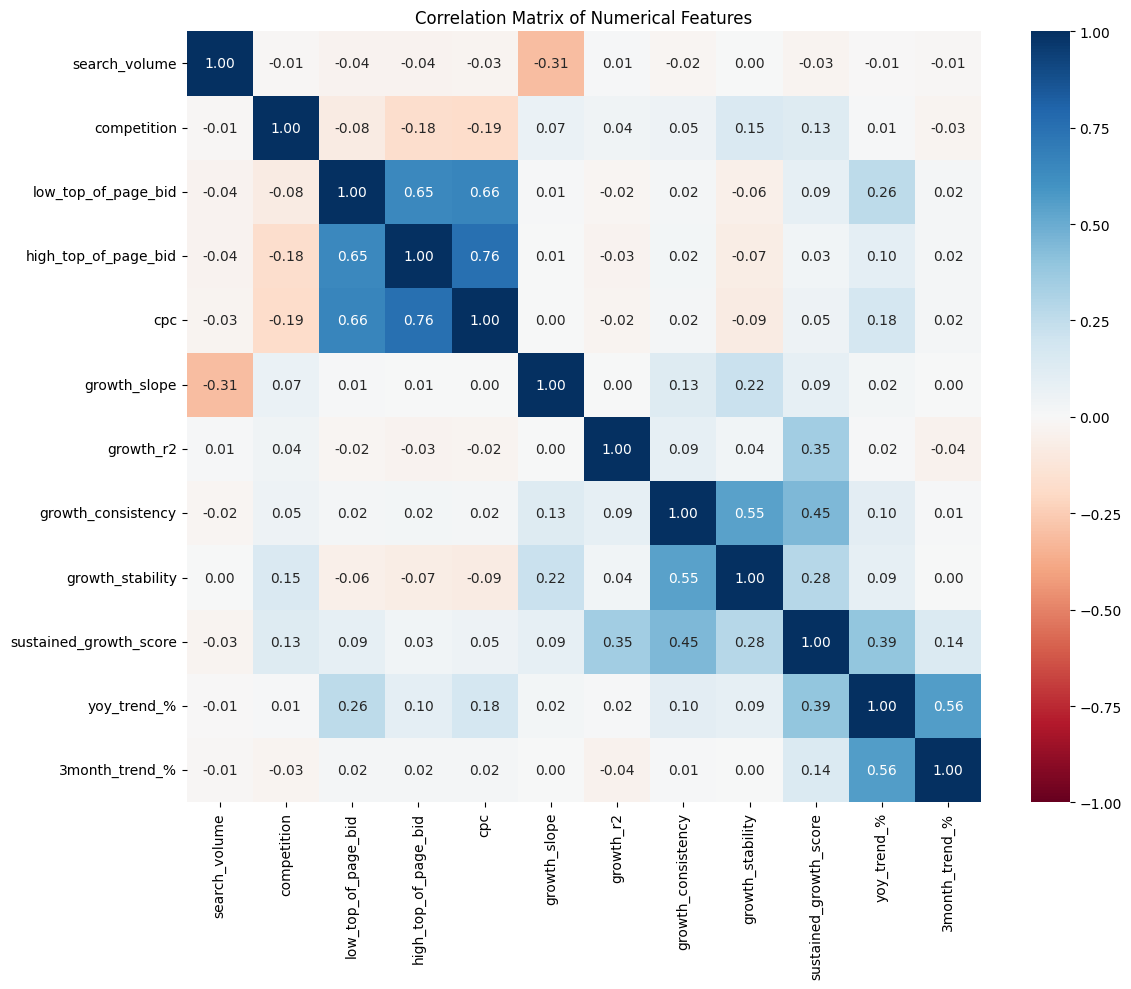

In [60]:
import seaborn as sns
# Calculate correlation matrix for numerical columns
correlation_matrix = valid_keywords.drop(columns=['keyword']).corr()

# Create a figure with appropriate size
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,  # Show correlation values 
            cmap='RdBu',  # Red-Blue colormap
            vmin=-1, vmax=1,  # Fix scale from -1 to 1
            center=0,  # Center colormap at 0
            fmt='.2f')  # Format correlation values to 2 decimal places

plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [61]:
df.to_csv('keywords_data.csv', index=False)